In [80]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import math
import statistics
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [81]:
from math import log10
from math import log2
from math import pow

In [82]:
calib_det1 = pd.read_csv('/Volumes/MAROUAN/MZI/Cal/MZIDie_MZI_cal_det1.txt', sep=" ", header=None)
calib_det2 = pd.read_csv('/Volumes/MAROUAN/MZI/Cal/MZIDie_MZI_cal_det2.txt', sep=" ", header=None)
calib_det3 = pd.read_csv('/Volumes/MAROUAN/MZI/Cal/MZIDie_MZI_cal_det1.txt', sep=" ", header=None)

In [83]:
bias = pd.read_csv('/Volumes/MAROUAN/MZI/MZI_PIN2_GSSG/Die_1_Subdie_10_MZI_bias.txt', sep=" ", header =None)
bias_inverse = bias*(-1)

In [84]:
# Benoit calculus
b_calculs = pd.read_csv("/Users/marouankouissi/Downloads/Phases_P05.txt")
Phi_left = b_calculs.iloc[:,1].tolist()
Phi_right = b_calculs.iloc[:,2].tolist()

In [85]:
# Function to find the first and second minimas
def Print2Smallest(arr, n): 
    MAX = 100000
    firstmin = MAX
    secmin = MAX
  
    for i in range(0, n): 
          
        if arr[i] < firstmin: 
            secmin = firstmin 
            firstmin = arr[i] 

        elif arr[i] < secmin: 
            secmin = arr[i] 
    return firstmin, secmin

In [86]:
MAX = 100000
  
def Print3Smallest(arr, n): 
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
  
    for i in range(0, n): 
          
        # Check if current element 
        # is less than firstmin,  
        # then update first,second 
        # and third 
  
        if arr[i] < firstmin: 
            thirdmin = secmin 
            secmin = firstmin 
            firstmin = arr[i] 
  
        # Check if current element is 
        # less than secmin then update 
        # second and third 
        elif arr[i] < secmin: 
            thirdmin = secmin 
            secmin = arr[i] 
  
        # Check if current element is 
        # less than,then upadte third 
        elif arr[i] < thirdmin: 
            thirdmin = arr[i] 
    return firstmin, secmin, thirdmin

In [87]:
# Function to find peaks 
def FindPeaks (data):
    x = [i*(-1) for i in data]
    _, peaks  = find_peaks(x, height=0)
    P = list(peaks.values())
    #print(P)
    minimas = [(-1)*i for i in P]
    #print(minimas)
    return Print3Smallest(minimas[0],len(minimas[0]))

In [88]:
# Function to find peaks 
def FindPeaks_1 (data):
    x = [i*(-1) for i in data]
    _, peaks  = find_peaks(x, height=0)
    P = list(peaks.values())
    #print(P)
    minimas = [(-1)*i for i in P]
    #print(minimas)
    return Print2Smallest(minimas[0],len(minimas[0]))

In [89]:
bias_2pi = []
bias_sigma = []
num_die = []
sigma = []
sigma_1 = []
sigma_2 = []
sigma_3 = []
Xtalk = []
Xtalk_bis = []
Loss = []
Loss_central = []
Data_list = []
Data_prime_list = []

Phi_left_bis = []
Phi_right_bis = []

for k in range(1,49):
    #if k in {7,9,11,13,14}:
        #continue
    #if k in {4,5,20,48}:
        #continue
    #if k in {6,46} :
        #continue
        
    if k==6:
        loop = pd.read_csv('/Volumes/MAROUAN/MZI/Loopback_GSSG/Die_{}_Subdie_10_MZI_Loopback.txt'.format(k), sep=" ", header=None)
        # wave_max = loop.iloc[1::,::][loop.iloc[1::,::][1]==loop.iloc[1::,::][1].max()].index[0]
        loop_back_trasm = [loop[1][k]-calib_det1[1][k] for k in range(1,1059)]
        wave_max = loop_back_trasm.index(max(loop_back_trasm))


        loop_bis = loop.iloc[wave_max,1]
    
        ms1 = pd.read_csv('/Volumes/MAROUAN/MZI/MZI_PIN1_GSSG/Die_{}_Subdie_10_MZI_meas.txt'.format(k), sep=" ", header=None)
        ms2 = pd.read_csv('/Volumes/MAROUAN/MZI/MZI_PIN2_GSSG/Die_{}_Subdie_10_MZI_meas.txt'.format(k), sep=" ", header=None)
    
        data_1 = (ms1.iloc[::,1::4].iloc[wave_max,::][::-1]-calib_det1.loc[wave_max,1]).values.tolist()
        data_2 = (ms2.iloc[::,1::4].iloc[wave_max,::]-calib_det1.loc[wave_max,1]).values.tolist()
        data = data_1+data_2

        data_1_prime = (ms1.iloc[::,2::4].iloc[wave_max,::][::-1]-calib_det2.loc[wave_max,1]).values.tolist()
        data_2_prime = (ms2.iloc[::,2::4].iloc[wave_max,::]-calib_det2.loc[wave_max,1]).values.tolist()
        data_prime = data_1_prime+data_2_prime
    
        bias_current_1 = bias[0][::-1].values.tolist()
        bias_current_2 = bias_inverse[0].values.tolist()
        bias_current = bias_current_1 + bias_current_2
    
        Data_list.append(data)
        Data_prime_list.append(data_prime)
    
        x1, x2, x3 = FindPeaks(data)
        #print(x1, x2, x3)
        v1 = abs(bias_current[data.index(x1)]-bias_current[data.index(x2)])
        v1_1 = abs(bias_current[data.index(x1)]-bias_current[data.index(x3)])

    
        y1, y2 = FindPeaks_1(data_prime)
        #print(x1, x2)
        u1 = abs(bias_current[data.index(x1)]-bias_current[data_prime.index(y1)])
        u1_1 = abs(bias_current[data.index(x1)]-bias_current[data_prime.index(y2)])

    
        v2 = abs(bias_current[data.index(x1)])
        v2 = (bias_current[data.index(x1)])
        v3 = (v2*(2*math.pi))/v1
        v3_1 = (v2*(2*math.pi))/v1_1
    
        u2 = (v2*(math.pi))/u1
        u3 = (v2*(math.pi))/u1_1
    
    
        #x1, x2, x3 = FindPeaks(data_prime)
        #print(x1, x2, x3)
    
        #y1, y2 = FindPeaks_1(data_prime)
        #print(y1, y2)
    
    
        #We calculate Xtalk by identifying first the min in orange curbe (see below),
        # then, the value in blue curve
        xt = data_prime[data.index(x1)] - data[data.index(x1)]
        xt_bis = data_prime[data.index(x1)] - data[data.index(x1)]
        #loss = loop_bis - data[data_prime.index(y1)]
        loss = loop_bis - max(data)
        loss_central = loop_bis - max(data_prime)
    
        num_die.append(k)
        bias_2pi.append(v1)
        bias_sigma.append(v2)
        sigma.append(v3)
        sigma_1.append(v3_1)
        sigma_2.append(u2)
        sigma_3.append(u3)
        Xtalk.append(xt)
        Xtalk_bis.append(xt_bis)
        Loss.append(loss)
        Loss_central.append(loss_central)
        Phi_left_bis.append(Phi_left[k-1])
        Phi_right_bis.append(Phi_right[k-1])
    
    if k in {6,7,11,20}:
        continue
    
    loop = pd.read_csv('/Volumes/MAROUAN/MZI/Loopback_GSSG/Die_{}_Subdie_10_MZI_Loopback.txt'.format(k), sep=" ", header=None)
    # wave_max = loop.iloc[1::,::][loop.iloc[1::,::][1]==loop.iloc[1::,::][1].max()].index[0]
    loop_back_trasm = [loop[1][k]-calib_det1[1][k] for k in range(1,1059)]
    wave_max = loop_back_trasm.index(max(loop_back_trasm))


    loop_bis = loop.iloc[wave_max,1]
    
    ms1 = pd.read_csv('/Volumes/MAROUAN/MZI/MZI_PIN1_GSSG/Die_{}_Subdie_10_MZI_meas.txt'.format(k), sep=" ", header=None)
    ms2 = pd.read_csv('/Volumes/MAROUAN/MZI/MZI_PIN2_GSSG/Die_{}_Subdie_10_MZI_meas.txt'.format(k), sep=" ", header=None)
    
    data_1 = (ms1.iloc[::,1::4].iloc[wave_max,::][::-1]-calib_det1.loc[wave_max,1]).values.tolist()
    data_2 = (ms2.iloc[::,1::4].iloc[wave_max,::]-calib_det1.loc[wave_max,1]).values.tolist()
    data = data_1+data_2

    data_1_prime = (ms1.iloc[::,2::4].iloc[wave_max,::][::-1]-calib_det2.loc[wave_max,1]).values.tolist()
    data_2_prime = (ms2.iloc[::,2::4].iloc[wave_max,::]-calib_det2.loc[wave_max,1]).values.tolist()
    data_prime = data_1_prime+data_2_prime
    
    bias_current_1 = bias[0][::-1].values.tolist()
    bias_current_2 = bias_inverse[0].values.tolist()
    bias_current = bias_current_1 + bias_current_2
    
    Data_list.append(data)
    Data_prime_list.append(data_prime)
    
    x1, x2, x3 = FindPeaks(data)
    #print(x1, x2, x3)
    v1 = abs(bias_current[data.index(x1)]-bias_current[data.index(x2)])
    v1_1 = abs(bias_current[data.index(x1)]-bias_current[data.index(x3)])

    
    y1, y2 = FindPeaks_1(data_prime)
    #print(x1, x2)
    u1 = abs(bias_current[data.index(x1)]-bias_current[data_prime.index(y1)])
    u1_1 = abs(bias_current[data.index(x1)]-bias_current[data_prime.index(y2)])

    
    v2 = abs(bias_current[data.index(x1)])
    v2 = (bias_current[data.index(x1)])
    v3 = (v2*(2*math.pi))/v1
    v3_1 = (v2*(2*math.pi))/v1_1
    
    u2 = (v2*(math.pi))/u1
    u3 = (v2*(math.pi))/u1_1
    
    
    #x1, x2, x3 = FindPeaks(data_prime)
    #print(x1, x2, x3)
    
    #y1, y2 = FindPeaks_1(data_prime)
    #print(y1, y2)
    
    
    #We calculate Xtalk by identifying first the min in orange curbe (see below),
    # then, the value in blue curve
    xt = data[data_prime.index(y1)] - data_prime[data_prime.index(y1)]
    xt_bis = data_prime[data.index(x1)] - data[data.index(x1)]
    #loss = loop_bis - data[data_prime.index(y1)]
    loss = loop_bis - max(data)
    loss_central = loop_bis - max(data_prime)
    
    num_die.append(k)
    bias_2pi.append(v1)
    bias_sigma.append(v2)
    sigma.append(v3)
    sigma_1.append(v3_1)
    sigma_2.append(u2)
    sigma_3.append(u3)
    Xtalk.append(xt)
    Xtalk_bis.append(xt_bis)
    Loss.append(loss)
    Loss_central.append(loss_central)
    Phi_left_bis.append(Phi_left[k-1])
    Phi_right_bis.append(Phi_right[k-1])

In [90]:
#Xtalk values linearization
Xtalk_linear = []
for k in Xtalk:
    val = pow(10,-k/10)
    Xtalk_linear.append(val)

In [91]:
print(min(Xtalk), max(Xtalk))
print(min(Xtalk_linear), max(Xtalk_linear))

20.80394140639509 31.328305850905068
0.000736494342196601 0.008310092526764908


In [92]:
Xtalk_var = statistics.pvariance(Xtalk_linear)
Xtalk_mean = statistics.mean(Xtalk_linear)
Xtalk_stdev = statistics.stdev(Xtalk_linear)
print(Xtalk_var, Xtalk_mean, Xtalk_stdev)

2.285705244224845e-06 0.004157286205343398 0.0015289385503297706


<h2 id="importing_libraries">Dilated Benes</h2>

In [93]:
def variance_SCR(N):
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m = max(Xtalk_linear)
    m = Xtalk_mean 
    k = log2(N)
    frac = (l_x**(2*(2*N-k-3)))/((k*(2*k-1)*m*m+2*(N-2)*m_x)**4)
    factor = frac*((2*k-1)**2)*(m**2)*(2*k)
    
    return factor*Xtalk_var

In [94]:
Var_SCR_list = []
for k in [4, 8, 16, 32]:
    Var_SCR_list.append(variance_SCR(k))

In [95]:
Var_SCR_list

[77045.42173098694, 3503.3420956990362, 190.86607418275574, 5.59680726269299]

In [96]:
def variance_SCR_simu(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    
    Loss_X = l_x**(2*N-k-3)
    Xtalk_X = 2*(N-2)*m_x
    Xtalk_MZI = 0
    
    l = int(2*k)
    MZI_perf = random.sample(Xtalk_linear, l)
    for i in range(0,l):
        for j in range(0,l):
            if j==i:
                continue
            Xtalk_MZI = Xtalk_MZI + (1/2)*MZI_perf[i]*MZI_perf[j]

    
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [97]:
Var_SCR_list_ = []
for k in [4, 8, 16, 32]:
    times = 10000
    SCR_values_simu = []
    for i in range(1,times+1):
        SCR_values_simu.append(variance_SCR_simu(k))
    Var_SCR_list_.append(statistics.pvariance(SCR_values_simu))

In [98]:
Var_SCR_list_

[71336.7664831035, 3145.4944613032744, 159.45275333058504, 4.525302713661882]

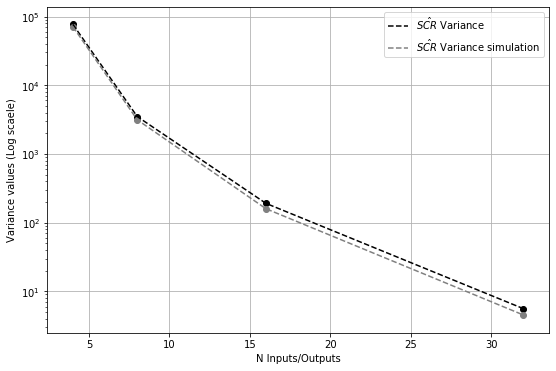

In [150]:
plt.figure(figsize=(9,6))
plt.grid(True)
plt.yscale("log")
plt.plot([4, 8, 16, 32], Var_SCR_list, '--' , c="k", label = "$\hat{SCR}$ Variance")
plt.scatter([4, 8, 16, 32], Var_SCR_list, c="k")
plt.plot([4, 8, 16, 32], Var_SCR_list_, '--' , c="grey", label = "$\hat{SCR}$ Variance simulation")
plt.scatter([4, 8, 16, 32], Var_SCR_list_, c="grey")
plt.xlabel("N Inputs/Outputs")
plt.ylabel("Variance values (Log scaele)")
plt.legend(loc='best')
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/V_Simu_DB.png')

In [100]:
print(statistics.mean(SCR_values_simu), statistics.pvariance(SCR_values_simu))

60.42718079247944 4.525302713661882


In [101]:
def SCR_DB(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m_mzi = 10**(-max(Xtalk)/10) 
    m_mzi = Xtalk_mean
    
    Loss_X = l_x**(2*N-k-3)
    Xtalk_MZI = k*(2*k-1)*m_mzi*m_mzi
    Xtalk_X = 2*(N-2)*m_x
    
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [102]:
SCR_values_list = []
for k in [4, 8, 16, 32]:
    SCR_values_list.append(SCR_DB(k))

In [103]:
SCR_values_list

[2620.9037106691735, 781.5158741431417, 249.8622521288912, 60.35368819287444]

In [104]:
# standar deviation
SCR_std_dev_list = [3*math.sqrt(k) for k in Var_SCR_list]

In [105]:
SCR_std_dev_list

[832.711712166271, 177.56711086598028, 41.44628653624835, 7.097271684544484]

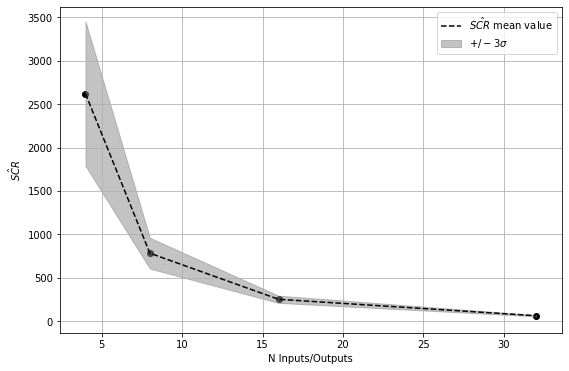

In [151]:
plt.figure(figsize = (9,6))
plt.grid(True)
#plt.yscale("log")
plt.plot([4, 8, 16, 32], SCR_values_list, '--', c = 'k', label = "$\hat{SCR}$ mean value")
plt.scatter([4, 8, 16, 32], SCR_values_list, c = 'k')
plt.fill_between([4, 8, 16, 32], [k+q for k,q in zip(SCR_values_list,SCR_std_dev_list)], [k-q for k,q in zip(SCR_values_list,SCR_std_dev_list)],color='#888888', alpha=0.5, label = "$+/- 3\sigma $")
#plt.annotate("$+3\sigma$", xy=(5.5,1999))
#plt.annotate("$-3\sigma$", xy=(5,1300))
plt.legend(loc="best")
plt.xlabel("N Inputs/Outputs")
plt.ylabel("$S\hat{C}R$")
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/mean_std_dev_DB.png')


 <h2 id="importing_libraries">Benes</h2>

In [107]:
def variance_SCR_Benes(N):
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m = max(Xtalk_linear)
    m = Xtalk_mean 
    k = log2(N)
    frac_1 = (l_x**(2*(N-k-1)))/(((2*k-1)*m+(2*k*k-3*k+1)*m*m+2*(N-k-1)*m_x)**4)
    factor_1 = frac_1*(2*k-1)
    
    frac_2 = (l_x**(2*(N-k-1)))/(((2*k-1)*m+(2*k*k-3*k+1)*m*m+2*(N-k-1)*m_x)**4)
    factor_2 = frac_2*(2*k-1)*((2*k-2)**2)*m*m
    #print(factor_2)
    
    factor = factor_1 + factor_2
    return factor*Xtalk_var

In [108]:
Var_SCR_Benes_list = []
for k in [4, 8, 16, 32]:
    Var_SCR_Benes_list.append(variance_SCR_Benes(k))

In [109]:
Var_SCR_Benes_list

[255.75447806938166, 44.79870583825021, 10.647609325355715, 2.1338035887025564]

In [110]:
def variance_SCR_Benes_bis(N):
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m = max(Xtalk_linear)
    m = Xtalk_mean 
    k = log2(N)
    frac_1 = (l_x**(2*(N-k-1)))/(((2*k-1)*m+(2*k*k-3*k+1)*m*m+2*(N-k-1)*m_x)**4)
    factor_1 = frac_1*(2*k-1)
    
    frac_2 = (l_x**(2*(N-k-1)))/(((2*k-1)*m+(2*k*k-3*k+1)*m*m+2*(N-k-1)*m_x)**4)
    factor_2 = frac_2*(2*k-1)*((2*k-2)**2)*m*m
    
    frac_3 = (l_x**(2*(N-k-1)))/(((2*k-1)*m+(2*k*k-3*k+1)*m*m+2*(N-k-1)*m_x)**4)
    factor_3 = frac_3*2*m*(2*k-2)*(2*k-1)
    
    factor = factor_1 + factor_2 + factor_3
    return factor*Xtalk_var

In [111]:
Var_SCR_Benes_list_bis = []
for k in [4, 8, 16, 32]:
    Var_SCR_Benes_list_bis.append(variance_SCR_Benes_bis(k))

In [112]:
Var_SCR_Benes_list_bis

[260.0071623268577, 46.28822227895521, 11.17846094771831, 2.275580083348671]

In [113]:
ancient_results = [255.7367984437824, 44.78632114594706, 10.640988618975518, 2.1314459668408197]

In [114]:
def variance_SCR_Benes_simu(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    m = Xtalk_mean
    
    Loss_X = l_x**(N-k-1)
    Xtalk_X = 2*(N-k-1)*m_x
    #Xtalk_MZI = (2*k*k-3*k+1)*m*m
    Xtalk_MZI = 0
    
    l = int(2*k-1)
    MZI_perf = random.sample(Xtalk_linear, l)
    
    for i in range(0,l):
        Xtalk_MZI = Xtalk_MZI + MZI_perf[i]

    for i in range(0,l):
        for j in range(0,l):
            if j==i:
                continue
            Xtalk_MZI = Xtalk_MZI + (1/2)*MZI_perf[i]*MZI_perf[j]
            
            
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [115]:
Var_SCR_Benes_list_ = []
for k in [4, 8, 16, 32]:
    times = 10000
    SCR_values_simu = []
    for i in range(1,times+1):
        SCR_values_simu.append(variance_SCR_Benes_simu(k))
    Var_SCR_Benes_list_.append(statistics.pvariance(SCR_values_simu))

In [116]:
Var_SCR_Benes_list_

[378.7824115029301, 52.09241595942304, 11.244301701220119, 2.0165390282521694]

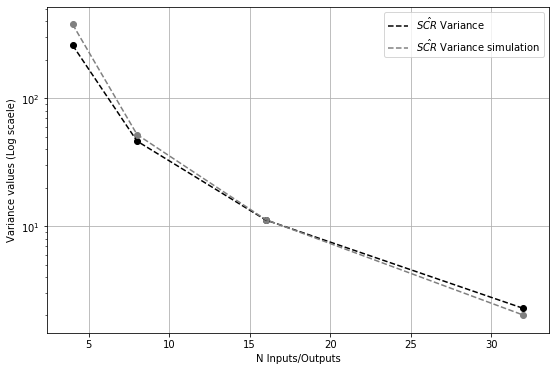

In [152]:
plt.figure(figsize=(9,6))
plt.grid(True)
plt.yscale("log")
plt.plot([4, 8, 16, 32], Var_SCR_Benes_list_bis, '--' , c="k", label = "$\hat{SCR}$ Variance")
plt.scatter([4, 8, 16, 32], Var_SCR_Benes_list_bis, c="k")
plt.plot([4, 8, 16, 32], Var_SCR_Benes_list_, '--' , c="grey", label = "$\hat{SCR}$ Variance simulation")
plt.scatter([4, 8, 16, 32], Var_SCR_Benes_list_, c="grey")
plt.xlabel("N Inputs/Outputs")
plt.ylabel("Variance values (Log scaele)")
plt.legend(loc='best')
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/V_Simu_B.png')

In [118]:
def SCR_B(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m_mzi = 10**(-max(Xtalk)/10) 
    m_mzi = Xtalk_mean
    
    Loss_X = l_x**(N-k-1)
    Xtalk_MZI = (2*k-1)*m_mzi + (2*k*k-3*k+1)*m_mzi*m_mzi
    Xtalk_X = 2*(N-k-1)*m_x
    
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [119]:
SCR_values_Benes_list = []
for k in [4, 8, 16, 32]:
    SCR_values_Benes_list.append(SCR_B(k))

In [120]:
def SCR_B_opt(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    m_mzi = 10**(-max(Xtalk)/10) 
    #m_mzi = Xtalk_mean
    
    Loss_X = l_x**(N-k-1)
    Xtalk_MZI = (2*k-1)*m_mzi + (2*k*k-3*k+1)*m_mzi*m_mzi
    Xtalk_X = 2*(N-k-1)*m_x
    
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [121]:
SCR_values_Benes_list_opt = []
for k in [4, 8, 16, 32]:
    SCR_values_Benes_list_opt.append(SCR_B_opt(k))

In [122]:
# standar deviation Benes
SCR_std_dev_Benes_list = [3*math.sqrt(k) for k in Var_SCR_Benes_list_bis]

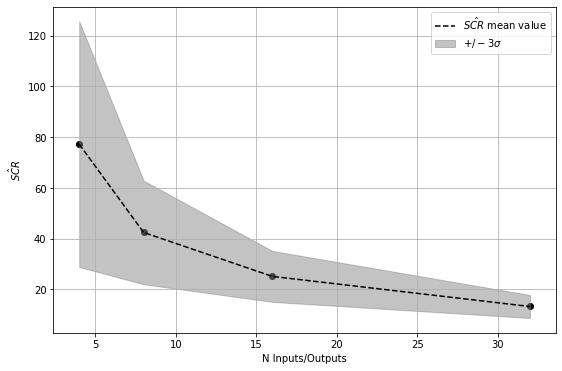

In [153]:
plt.figure(figsize = (9,6))
plt.grid(True)
#plt.yscale("log")
plt.plot([4, 8, 16, 32], SCR_values_Benes_list, '--', c = 'k', label = "$\hat{SCR}$ mean value")
plt.scatter([4, 8, 16, 32], SCR_values_Benes_list, c = 'k')
plt.fill_between([4, 8, 16, 32], [k+q for k,q in zip(SCR_values_Benes_list,SCR_std_dev_Benes_list)], [k-q for k,q in zip(SCR_values_Benes_list,SCR_std_dev_Benes_list)],color='#888888',alpha=0.5, label = "$+/- 3\sigma $")

plt.legend(loc="best")
plt.xlabel("N Inputs/Outputs")
plt.ylabel("$S\hat{C}R$")
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/mean_std_dev_B.png')

<h2> DLN </h2>

In [124]:
def variance_SCR_simu_DLN(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    
    Loss_X = l_x**((3/2)*N-k-2)
    Xtalk_X = 3*((N/2)-1)*m_x
    Xtalk_MZI = 0
    
    l = int((2*k)-1)
    MZI_perf = random.sample(Xtalk_linear, l)
    for i in range(0,l):
        for j in range(0,l):
            if j==i:
                continue
            Xtalk_MZI = Xtalk_MZI + (1/(2*((2*k)-1)))*MZI_perf[i]*MZI_perf[j]

    for i in range(0,l):
        Xtalk_MZI = Xtalk_MZI + (1/((2*k)-1))*MZI_perf[i]
        
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [125]:
Var_SCR_list_DLN_ = []
for k in [4, 8, 16, 32]:
    times = 10000
    SCR_values_simu = []
    for i in range(1,times+1):
        SCR_values_simu.append(variance_SCR_simu_DLN(k))
    Var_SCR_list_DLN_.append(statistics.pvariance(SCR_values_simu))

In [126]:
Var_SCR_list_DLN_

[2681.3667092126566, 704.1642832773564, 150.93355104811005, 14.209941880762242]

In [127]:
def variance_SCR_DLN(N):
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m = max(Xtalk_linear)
    m = Xtalk_mean 
    k = log2(N)
    
    frac = (l_x**(2*((3/2)*N-k-2)))/((m+(k-1)*m*m+3*((N/2)-1)*m_x)**4)
    factor = frac*((1+2*m*(k-1))**2)/((2*k)-1)
    
    return factor*Xtalk_var

In [128]:
Var_SCR_list_DLN = []
for k in [4, 8, 16, 32]:
    Var_SCR_list_DLN.append(variance_SCR_DLN(k))

In [129]:
Var_SCR_list_DLN

[1948.0909949773072, 666.8865333914689, 159.63196515664436, 16.465247099165467]

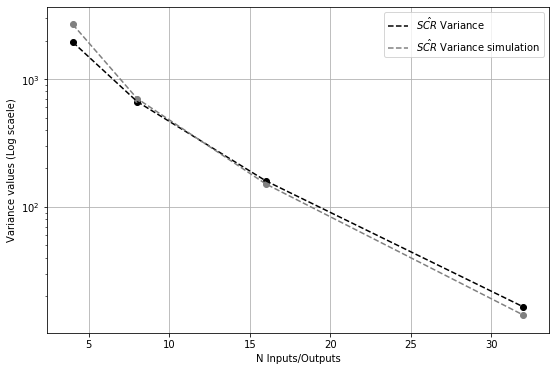

In [154]:
plt.figure(figsize=(9,6))
plt.grid(True)
plt.yscale("log")
plt.plot([4, 8, 16, 32], Var_SCR_list_DLN, '--' , c="k", label = "$\hat{SCR}$ Variance")
plt.scatter([4, 8, 16, 32], Var_SCR_list_DLN, c="k")
plt.plot([4, 8, 16, 32], Var_SCR_list_DLN_, '--' , c="grey", label = "$\hat{SCR}$ Variance simulation")
plt.scatter([4, 8, 16, 32], Var_SCR_list_DLN_, c="grey")

plt.xlabel("N Inputs/Outputs")
plt.ylabel("Variance values (Log scaele)")
plt.legend(loc='best')
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/V_Simu_DLN.png')

In [131]:
def SCR_DLN(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m_mzi = 10**(-max(Xtalk)/10) 
    m_mzi = Xtalk_mean
    
    Loss_X = l_x**((3/2)*N-k-2)
    Xtalk_MZI = m_mzi + (k-1)*m_mzi*m_mzi
    Xtalk_X = 3*((N/2)-1)*m_x
    
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [132]:
SCR_values_DLN_list = []
for k in [4, 8, 16, 32]:
    SCR_values_DLN_list.append(SCR_DLN(k))

In [133]:
# standar deviation DLN
SCR_std_dev_DLN_list = [3*math.sqrt(k) for k in Var_SCR_list_DLN]

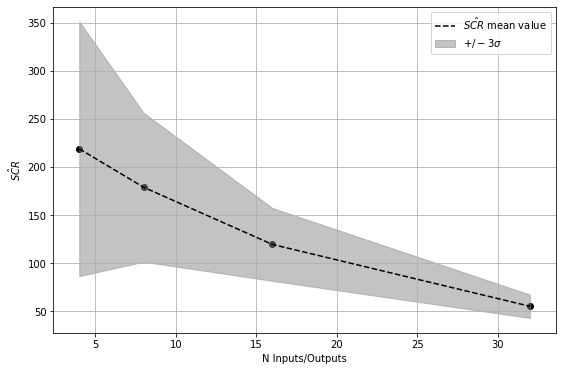

In [155]:
plt.figure(figsize = (9,6))
plt.grid(True)
#plt.yscale("log")
plt.plot([4, 8, 16, 32], SCR_values_DLN_list, '--', c = 'k', label = "$\hat{SCR}$ mean value")
plt.scatter([4, 8, 16, 32], SCR_values_DLN_list, c = 'k')
plt.fill_between([4, 8, 16, 32], [k+q for k,q in zip(SCR_values_DLN_list,SCR_std_dev_DLN_list)], [k-q for k,q in zip(SCR_values_DLN_list,SCR_std_dev_DLN_list)],color='#888888',alpha=0.5, label = "$+/- 3\sigma $")

plt.legend(loc="best")
plt.xlabel("N Inputs/Outputs")
plt.ylabel("$S\hat{C}R$")
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/mean_std_dev_DLN.png')

<h2> S&S </h2>

In [138]:
def variance_SCR_simu_SS(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    
    Loss_X = l_x**((N-1)**2)
    Xtalk_X = (N-1)*m_x
    Xtalk_MZI = 0
    
    l = int(2*k)
    MZI_perf = random.sample(Xtalk_linear, l)
    for i in range(0,l):
        for j in range(0,l):
            if j==i:
                continue
            Xtalk_MZI = Xtalk_MZI + (1/(2*((2*k)-1)))*MZI_perf[i]*MZI_perf[j]
        
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [139]:
Var_SCR_list_SS_ = []
for k in [4, 8, 16, 32]:
    times = 10000
    SCR_values_simu = []
    for i in range(1,times+1):
        SCR_values_simu.append(variance_SCR_simu_SS(k))
    Var_SCR_list_SS_.append(statistics.pvariance(SCR_values_simu))

In [140]:
Var_SCR_list_SS_

[38403.610973716175,
 374.468101926086,
 0.007860542687531882,
 1.0788350912051892e-18]

In [141]:
def variance_SCR_SS(N):
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m = max(Xtalk_linear)
    m = Xtalk_mean 
    k = log2(N)
    
    frac = (l_x**(2*((N-1)**2)))/((k*m*m+(N-1)*m_x)**4)
    factor = frac*2*k*m*m
    
    return factor*Xtalk_var

In [142]:
Var_SCR_list_SS = []
for k in [4, 8, 16, 32]:
    Var_SCR_list_SS.append(variance_SCR_SS(k))

In [143]:
Var_SCR_list_SS

[41576.35064833689,
 418.3839500247853,
 0.009394935520496969,
 1.3680167072186181e-18]

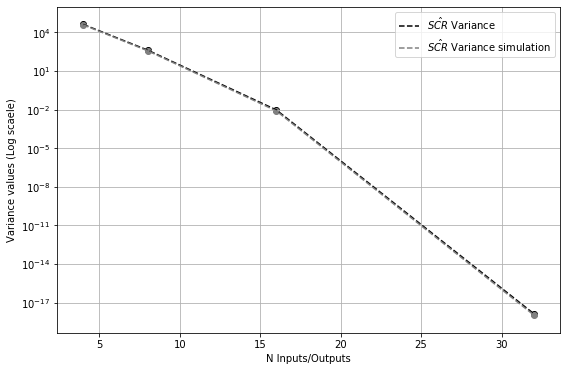

In [156]:
plt.figure(figsize=(9,6))
plt.grid(True)
plt.yscale("log")
plt.plot([4, 8, 16, 32], Var_SCR_list_SS, '--' , c="k", label = "$\hat{SCR}$ Variance")
plt.scatter([4, 8, 16, 32], Var_SCR_list_SS, c="k")
plt.plot([4, 8, 16, 32], Var_SCR_list_SS_, '--' , c="grey", label = "$\hat{SCR}$ Variance simulation")
plt.scatter([4, 8, 16, 32], Var_SCR_list_SS_, c="grey")

plt.xlabel("N Inputs/Outputs")
plt.ylabel("Variance values (Log scaele)")
plt.legend(loc='best')
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/V_Simu_SS.png')

In [145]:
def SCR_SS(N):
    k = log2(N)
    l_x = 10**(-0.1/10)
    m_x = 10**(-42./10)
    #m_mzi = 10**(-max(Xtalk)/10) 
    m_mzi = Xtalk_mean
    
    Loss_X = l_x**((N-1)**2)
    Xtalk_MZI = k*m_mzi*m_mzi
    Xtalk_X = (N-1)*m_x
    
    return Loss_X/(Xtalk_MZI+Xtalk_X)

In [146]:
SCR_values_SS_list = []
for k in [4, 8, 16, 32]:
    SCR_values_SS_list.append(SCR_SS(k))

In [147]:
# standar deviation SS
SCR_std_dev_SS_list = [3*math.sqrt(k) for k in Var_SCR_list_SS]

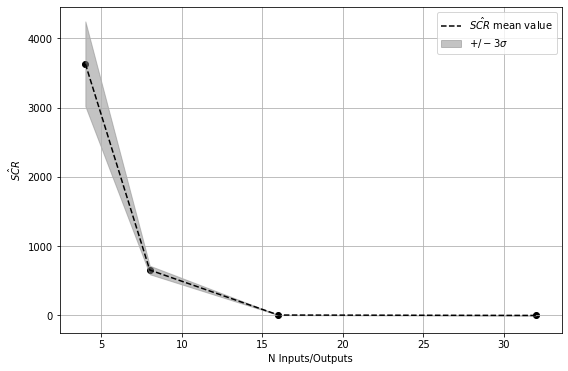

In [157]:
plt.figure(figsize = (9,6))
plt.grid(True)
#plt.yscale("log")
plt.plot([4, 8, 16, 32], SCR_values_SS_list, '--', c = 'k', label = "$\hat{SCR}$ mean value")
plt.scatter([4, 8, 16, 32], SCR_values_SS_list, c = 'k')
plt.fill_between([4, 8, 16, 32], [k+q for k,q in zip(SCR_values_SS_list,SCR_std_dev_SS_list)], [k-q for k,q in zip(SCR_values_SS_list,SCR_std_dev_SS_list)],color='#888888',alpha=0.5, label = "$+/- 3\sigma $")

plt.legend(loc="best")
plt.xlabel("N Inputs/Outputs")
plt.ylabel("$S\hat{C}R$")
plt.savefig('/Users/marouankouissi/Desktop/AS_graphs/mean_std_dev_SS.png')